In [5]:
import sklearn
from pathlib import Path
import pandas as pd
import zipfile
import matplotlib.pyplot as plt
from math import floor

In [6]:
def load_apple_data():
    csv_file = "datasets/apple_quality.csv"
    return pd.read_csv(csv_file)
dataset = load_apple_data()


In [7]:
#print(dataset[dataset['A_id'].isnull()])
#line 4000 contains NaN only -> garbage
dataset = dataset[0:3999]
dataset["Acidity"] = pd.to_numeric(dataset["Acidity"]) #otherwise the range makes it considered as string data

In [8]:
#p52
#dataset.head()
#dataset.info()
#dataset['Juiciness'].value_counts()
#dataset['A_id'].head()
#dataset.describe()


In [9]:
#Nettoyer les donnees p68, a faire avant de split le dataset et le test set
#Imputer les donnees manquantes

In [10]:
#p 54
#dataset.hist(bins=100, figsize=(12, 8))
#plt.show()

In [51]:
from zlib import crc32
import numpy as np

#QUICK WAY
#train_set, test_set = train_set_split(dataset, test_size=0.2,random_state=42)
def is_in_test_set(identifier, test_ratio):
    return crc32(np.int64(int(identifier))) < test_ratio * 2**32

def split_data_with_id_hash(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: is_in_test_set(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]
#si le dataset ne contient pas de ligne index
#dataset_with_id = dataset.reset_index()
train_set, test_set = split_data_with_id_hash(dataset, 0.2, 'A_id')
#train_set.head()
#test_set.head()
#test_set[test_set['Quality']=='good']

In [52]:
#Pour echantillonage "stratifie" (plus representatif)
#page 59

<Axes: xlabel='Ripeness', ylabel='Acidity'>

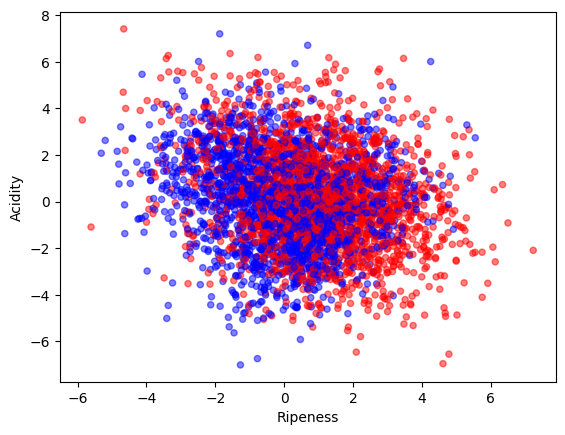

In [53]:
#page 61
colors = ['red' if label == 'bad' else 'blue' for label in dataset['Quality']]
dataset.plot(kind="scatter", x='Ripeness', y='Acidity', c=colors, alpha=0.5)

array([[<Axes: xlabel='Acidity', ylabel='Acidity'>,
        <Axes: xlabel='Size', ylabel='Acidity'>,
        <Axes: xlabel='Weight', ylabel='Acidity'>,
        <Axes: xlabel='Sweetness', ylabel='Acidity'>,
        <Axes: xlabel='Ripeness', ylabel='Acidity'>],
       [<Axes: xlabel='Acidity', ylabel='Size'>,
        <Axes: xlabel='Size', ylabel='Size'>,
        <Axes: xlabel='Weight', ylabel='Size'>,
        <Axes: xlabel='Sweetness', ylabel='Size'>,
        <Axes: xlabel='Ripeness', ylabel='Size'>],
       [<Axes: xlabel='Acidity', ylabel='Weight'>,
        <Axes: xlabel='Size', ylabel='Weight'>,
        <Axes: xlabel='Weight', ylabel='Weight'>,
        <Axes: xlabel='Sweetness', ylabel='Weight'>,
        <Axes: xlabel='Ripeness', ylabel='Weight'>],
       [<Axes: xlabel='Acidity', ylabel='Sweetness'>,
        <Axes: xlabel='Size', ylabel='Sweetness'>,
        <Axes: xlabel='Weight', ylabel='Sweetness'>,
        <Axes: xlabel='Sweetness', ylabel='Sweetness'>,
        <Axes: xlabel='Rip

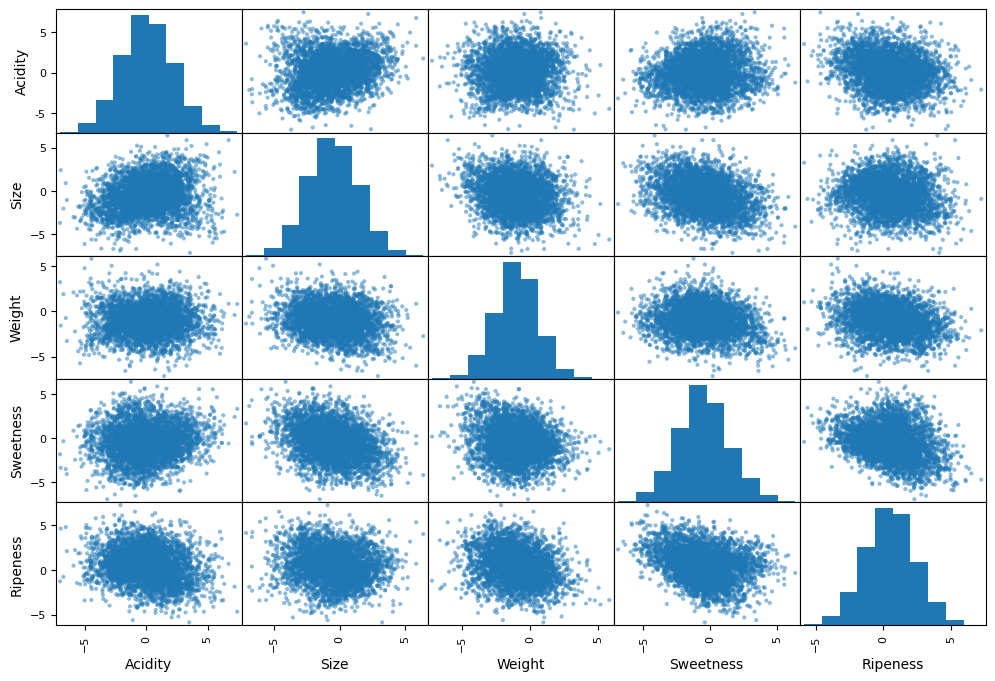

In [55]:
#correlations des variables
corr_matrix = dataset.corr(numeric_only=True)
#print(corr_matrix)
#print(corr_matrix['Sweetness'].sort_values(ascending=False))
#p64
dataset["Acidity"] = pd.to_numeric(dataset["Acidity"])
from pandas.plotting import scatter_matrix
attributes=["Acidity", "Size", "Weight", "Sweetness", "Ripeness"]
scatter_matrix(dataset[attributes], figsize=(12,8))

In [56]:
#experimenter les combinaisons de variables p.66
#(peu d'interet dans l'etude des pommes)

In [57]:
#Preparation des donnees
#dataset_test.head()
#Transformation des variables qualitatives
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
#type(train_set[["Quality"]])
train_set_labels = ordinal_encoder.fit_transform(train_set[["Quality"]])
train_set = train_set.drop('Quality', axis=1)
test_set_labels = ordinal_encoder.fit_transform(test_set[["Quality"]])
test_set = test_set.drop('Quality', axis=1)
#train_set_labels[:8]

In [58]:
#selectionner et entrainer un model
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
lin_reg = make_pipeline(StandardScaler(), LinearRegression())
lin_reg.fit(train_set, train_set_labels)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [79]:
predictions = lin_reg.predict(test_set)
#round_ = np.vectorize(lambda x: round(x))
predictions = np.round(predictions)

In [87]:
result = []
for i in range(0, test_set_labels.size):
    result.append(test_set_labels[i] == predictions[i])

In [91]:
print(100 * result.count(True) / test_set_labels.size, " %")

74.0  %
